<a href="https://colab.research.google.com/github/mord1k/hexlet-git/blob/main/data_analyst_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1tn6EKuYQ9JSx9DQ1PAAqfgSWTuPHFY1N/view?usp=sharing

In [163]:
! gdown --id 1tn6EKuYQ9JSx9DQ1PAAqfgSWTuPHFY1N

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tn6EKuYQ9JSx9DQ1PAAqfgSWTuPHFY1N
To: /content/df_testcase.csv
100% 6.74M/6.74M [00:00<00:00, 78.3MB/s]


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv('/content/df_testcase.csv')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25839 entries, 0 to 25838
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   session_id  25839 non-null  object 
 1   event_date  25839 non-null  object 
 2   user_id     6356 non-null   float64
 3   event_id_1  25839 non-null  object 
 4   event_id_2  25839 non-null  object 
 5   event_id_3  24466 non-null  object 
 6   event_id_4  21696 non-null  object 
 7   event_id_5  12111 non-null  object 
 8   event_id_6  16676 non-null  object 
 9   event_id_7  15658 non-null  object 
 10  event_id_8  15925 non-null  object 
 11  event_id_9  20111 non-null  object 
 12  value_0     25839 non-null  float64
 13  value_1     25839 non-null  float64
 14  value_2     25839 non-null  float64
dtypes: float64(4), object(11)
memory usage: 3.0+ MB


In [167]:
df.head()

,session_id,event_date,user_id,event_id_1,event_id_2,event_id_3,event_id_4,event_id_5,event_id_6,event_id_7,event_id_8,event_id_9,value_0,value_1,value_2
0,F9C68F64-55F8-4D11-8B7B-4DE660B34673,2023-04-16 03:02:28,251082.0,level,251082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,0.0,0.0
1,F9C68F64-55F8-4D11-8B7B-4DE660B34673,2023-04-16 03:06:57,251082.0,player,skin_main,1000,7000,8000,9000,10000,NaN,arn:aws:gamelift:eu-central-1::gamesession/fle...,0.0,0.0,0.0
2,F9C68F64-55F8-4D11-8B7B-4DE660B34673,2023-04-16 03:06:57,251082.0,player,skin_social,2000,0,0,4000,6000,NaN,arn:aws:gamelift:eu-central-1::gamesession/fle...,0.0,0.0,0.0
3,F9C68F64-55F8-4D11-8B7B-4DE660B34673,2023-04-16 03:10:48,251082.0,player,skin_main,1000,7000,8000,9000,10000,NaN,arn:aws:gamelift:eu-central-1::gamesession/fle...,0.0,0.0,0.0
4,F9C68F64-55F8-4D11-8B7B-4DE660B34673,2023-04-16 03:10:48,251082.0,player,skin_social,2000,0,0,4000,6000,NaN,arn:aws:gamelift:eu-central-1::gamesession/fle...,0.0,0.0,0.0


Поменяем тип данных в столбце `event_date`.

In [168]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d %H:%M:%S')
df['user_id'].isna().sum()

19483

Заполним пропуски

In [169]:
df['user_id'] = df['user_id'].fillna(-1).astype('int')
df['event_id_3'] = df['event_id_3'].fillna(-1)
df['event_id_4'] = df['event_id_4'].fillna(-1)
df['event_id_5'] = df['event_id_5'].fillna(-1)
df['event_id_6'] = df['event_id_6'].fillna(-1)
df['event_id_7'] = df['event_id_7'].fillna(-1)
df['event_id_8'] = df['event_id_8'].fillna(-1)
df['event_id_9'] = df['event_id_9'].fillna(-1)

# **Количество уникальных игроков.**

In [170]:
df['user_id'].nunique()-1

628

Количество уникальных игроков 628 человек.

In [171]:
df[df['event_id_2'] == 'session']['user_id'].nunique()

228


Количество уникальных игроков, которые начинали сеcсию 228 человек.

# **Средняя длина сессии и количество сессий каждого игрока**

In [93]:
list = []
for i in df['session_id'].unique():
  a = df[df['session_id'] == i]['event_date'].min()
  b = df[df['session_id'] == i]['event_date'].max()
  list.append(b-a)
series = pd.DataFrame(list).reset_index(drop=True)
series_2 = pd.DataFrame(df['session_id'].unique()).reset_index(drop=True)
sessions = series_2.join(series,
on=series.index,
how='left',
lsuffix='_первый датафрейм',
rsuffix='_второй датафрейм'
)
sessions.columns = ['session_id', 'duration_time']
sessions.head()

,session_id,duration_time
0,F9C68F64-55F8-4D11-8B7B-4DE660B34673,0 days 00:08:20
1,DEA67743-A7A0-4C07-884E-1B72546C0B77,0 days 00:26:11
2,99B561DA-6619-4D1D-BDFC-991C85C59EBD,0 days 00:08:15
3,0CB400BA-CA3C-4E0D-9A6F-13DCDF7688DF,0 days 00:09:33
4,05E4A887-3EDA-48AC-A7E8-DF5906334023,0 days 00:09:51


In [94]:
sessions['duration_time'].describe()

count                         1849
mean     0 days 00:15:49.503515413
std      0 days 00:44:40.932576870
min                0 days 00:00:00
25%                0 days 00:01:21
50%                0 days 00:06:50
75%                0 days 00:15:54
max                0 days 16:36:35
Name: duration_time, dtype: object

Если считать, что id сессии присваивается в любом случае при том, что сессия есть, то среднее время сессии равняется 15 минут 49 секунд.

In [95]:
sessions = pd.merge(df, sessions, on='session_id', how='left')
sessions.sort_values(by='duration_time')['duration_time']

16354   0 days 00:00:00
4908    0 days 00:00:00
16298   0 days 00:00:00
16297   0 days 00:00:00
4956    0 days 00:00:00
              ...      
23773   0 days 15:33:38
9606    0 days 15:33:38
25733   0 days 16:36:35
15714   0 days 16:36:35
15715   0 days 16:36:35
Name: duration_time, Length: 25839, dtype: timedelta64[ns]

In [96]:
sessions[(sessions['duration_time'] > '0 days 00:00:00') & (sessions['event_id_2'] == 'session')].describe()

,user_id,value_0,value_1,value_2,duration_time
count,359.000000,359.0,359.0,359.0,359
mean,212206.740947,0.0,0.0,0.0,0 days 00:41:01.899721448
std,48337.295316,0.0,0.0,0.0,0 days 01:12:15.589476326
min,100254.000000,0.0,0.0,0.0,0 days 00:00:03
25%,190264.500000,0.0,0.0,0.0,0 days 00:05:26.500000
50%,236271.000000,0.0,0.0,0.0,0 days 00:21:49
75%,251305.000000,0.0,0.0,0.0,0 days 00:50:59
max,251666.000000,0.0,0.0,0.0,0 days 15:33:38


Средняя продолжительность сессии равняется 41 минуте, в то время как медианное значение равно 21 минута. Соответвенно, можно сделать вывод, что большинство игроков тратят времени на сессию в районе 20 минут, а некоторые игроки увеличивают средную продолжительность сессии за счет очень длинных сессий. Данные учитвают начало сессии с маркером event_2 = 'session'. 

In [97]:
count_sessions = df.groupby('user_id')['session_id'].count()

In [98]:
count_sessions = pd.DataFrame(count_sessions)

Количество сессий по столбцу `user_id`, маркер -1 говорит о том, что `user_id` не указан, поэтому мы не можем идентифицировать игрока.

In [99]:
count_sessions.sort_values(by='session_id', ascending=False)

,session_id
user_id,
-1,19483
116074,88
193904,87
176183,86
100646,84
...,...
250801,1
250754,1
250709,1


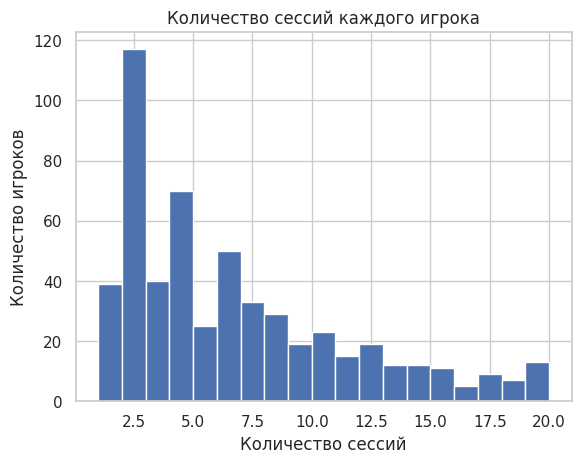

In [100]:
plt.hist(count_sessions, bins=range(1, 21))
plt.xlabel('Количество сессий')
plt.ylabel('Количество игроков')
plt.title('Количество сессий каждого игрока')
plt.show()

In [101]:
count_sessions.value_counts()

session_id
2             117
4              70
6              50
3              40
1              39
7              33
8              29
5              25
10             23
12             19
9              19
11             15
13             12
14             12
15             11
17              9
21              9
19              8
18              7
22              6
23              6
25              6
20              5
16              5
31              5
30              4
24              3
48              3
41              2
61              2
59              2
46              2
45              2
44              2
43              2
29              2
32              2
26              2
27              2
39              1
57              1
88              1
87              1
86              1
84              1
68              1
56              1
37              1
55              1
54              1
51              1
28              1
34              1
35              1
36              1

In [102]:
count_sessions[count_sessions.index > 0].mean()

session_id    10.121019
dtype: float64

Видим, что большинство людей проводят до 10 сессий. Среденее количесвто сессий равняется 10.

#  Популярность скинов во всех слотах

In [113]:
def skins(event, title):
  x = df[(df['event_id_2'] == 'skin_main') & (df[event] != -1)]
  x = x.groupby(event)[event].count().sort_values()
  x.plot(figsize=(5,3))
  plt.xlabel('Event ID')
  plt.ylabel('Count')
  plt.title(f'{title} skin main')
  plt.show()
  print(x)
  y = df[df['event_id_2'] == 'skin_social']
  y = y.groupby(event)[event].count().sort_values()
  y.plot(figsize=(5,3))
  plt.xlabel('Event ID')
  plt.ylabel('Count')
  plt.title(f'{title} skin social')
  plt.show()
  print(y)

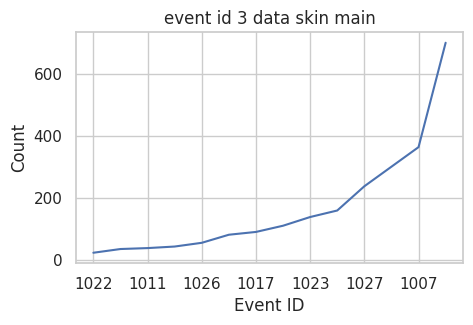

event_id_3
1022     24
1014     36
1011     39
1025     44
1026     56
1021     82
1017     91
1019    111
1023    139
1012    160
1027    238
1006    301
1007    364
1000    700
Name: event_id_3, dtype: int64


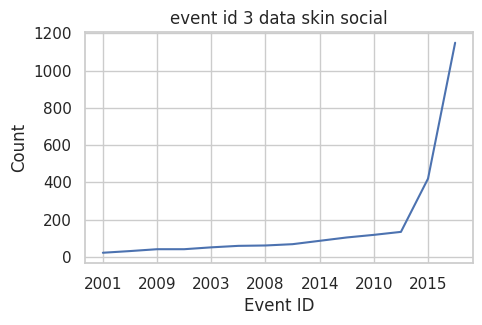

event_id_3
2001      22
2012      31
2009      41
2011      41
2003      51
2004      59
2008      61
2002      68
2014      86
2013     104
2010     118
2007     134
2015     420
2000    1149
Name: event_id_3, dtype: int64


In [114]:
skins('event_id_3', 'event id 3 data')

Видим, что в event_id 3 самые популярные id при skin_main 1000, а при skin_social 2000.

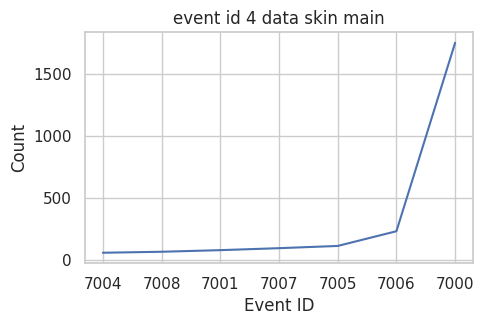

event_id_4
7004      56
7008      64
7001      77
7007      93
7005     111
7006     230
7000    1754
Name: event_id_4, dtype: int64


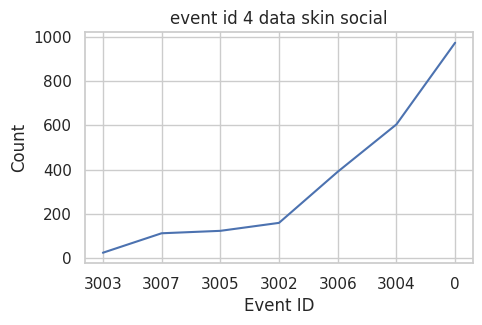

event_id_4
3003     24
3007    112
3005    123
3002    159
3006    390
3004    604
0       973
Name: event_id_4, dtype: int64


In [115]:
skins('event_id_4', 'event id 4 data')

Самый популярный скин в event_id 4 при skin_main 7000, а при skin_social 0.

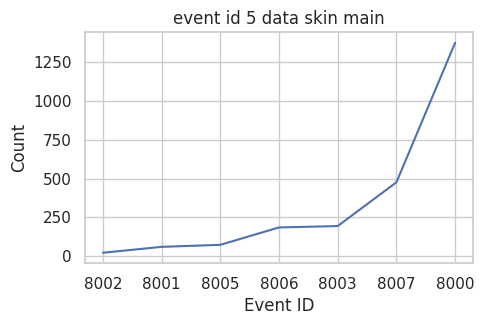

event_id_5
8002      22
8001      60
8005      73
8006     185
8003     194
8007     476
8000    1375
Name: event_id_5, dtype: int64


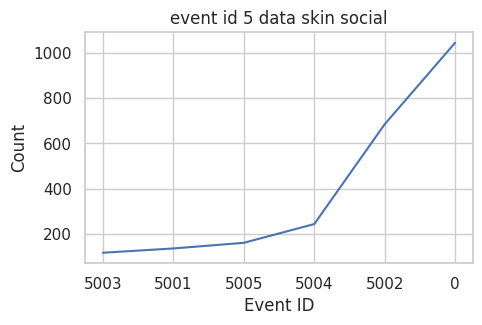

event_id_5
5003     116
5001     135
5005     160
5004     243
5002     685
0       1046
Name: event_id_5, dtype: int64


In [116]:
skins('event_id_5', 'event id 5 data')

Самый популярный скин в event_id 5 при skin_main 8000, а при skin_social 0.

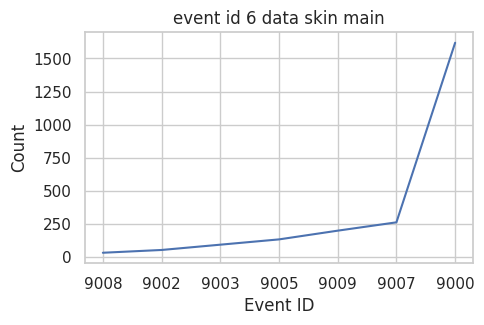

event_id_6
9008      31
9002      52
9003      92
9005     132
9009     198
9007     261
9000    1619
Name: event_id_6, dtype: int64


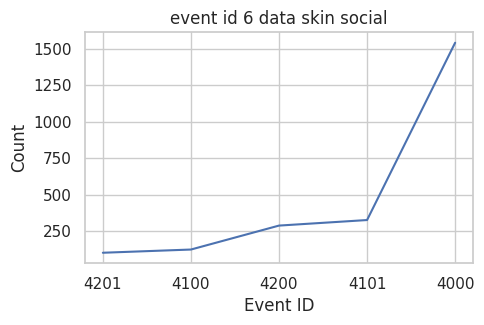

event_id_6
4201     103
4100     125
4200     289
4101     327
4000    1541
Name: event_id_6, dtype: int64


In [117]:
skins('event_id_6', 'event id 6 data')

Самый популярный скин в event_id 6 при skin_main 9000, а при skin_social 4000.

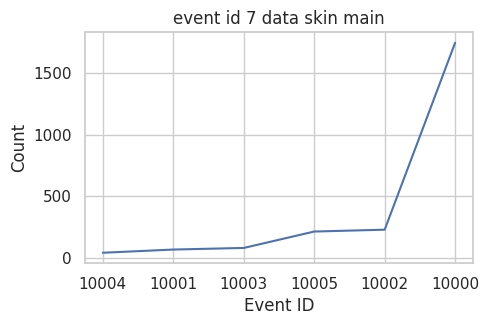

event_id_7
10004      43
10001      69
10003      82
10005     215
10002     230
10000    1746
Name: event_id_7, dtype: int64


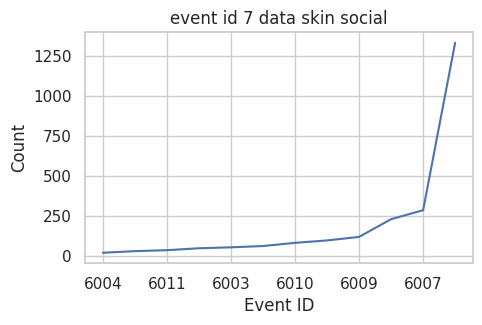

event_id_7
6004      19
6008      29
6011      35
6005      47
6003      53
6002      61
6010      81
6012      96
6009     118
6006     229
6007     285
6000    1332
Name: event_id_7, dtype: int64


In [119]:
skins('event_id_7', 'event id 7 data')

Самый популярный скин в event_id 7 при skin_main 10000, а при skin_social 6000.

# График почасового онлайна

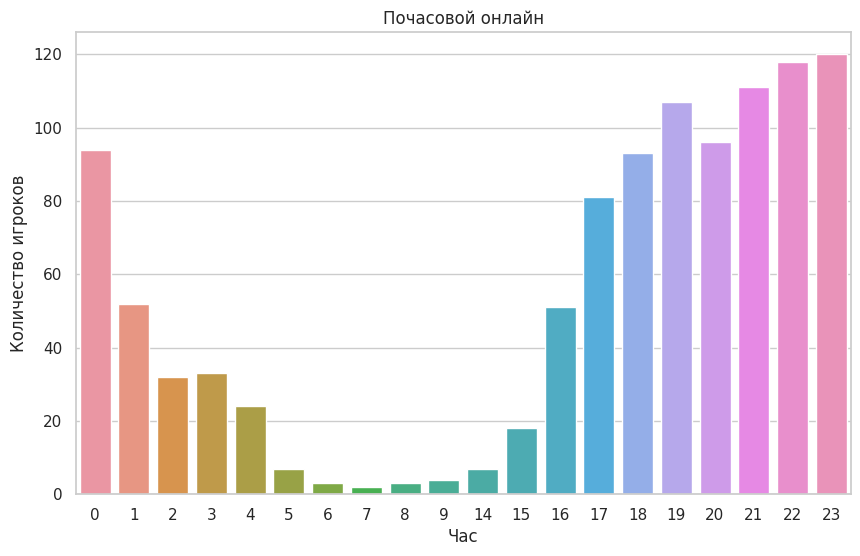

In [ ]:
df['event_date'] = pd.to_datetime(df['event_date'])
df['hour'] = df['event_date'].dt.hour
hourly_online = df.groupby('hour').agg({'user_id': 'nunique'}).reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="hour", y="user_id", data=hourly_online)
plt.title('Почасовой онлайн')
plt.xlabel('Час')
plt.ylabel('Количество игроков')
plt.show()

Количество игроков минимальное значение имеет в 7 утра, начиная с 14 часов идет сильный рост, затем уменьшение к утру.

# Cегментация по среднему времени игры и всем игровым режимам

In [139]:
segmentation = sessions[(sessions['event_id_1'].isin(['horde', 'ctf', 'koth', 'dm', 'tdm'])) & (sessions['duration_time'] > '0 days 00:00:00')]

In [145]:
segmentation['event_id_1'].unique()

array(['ctf', 'horde', 'dm', 'tdm', 'koth'], dtype=object)

In [157]:
grouped = pd.DataFrame(segmentation.groupby('event_id_1')['duration_time'].mean())


In [158]:
grouped['duration_time'] = grouped['duration_time'].apply(lambda x: x.total_seconds() / 60)

In [172]:
grouped

,duration_time,segment_time
event_id_1,,
ctf,21.721242,более 20 минут
dm,16.186242,от 15 до 20 минут
horde,13.110312,менее 15 минут
koth,15.766418,от 15 до 20 минут
tdm,12.935976,менее 15 минут


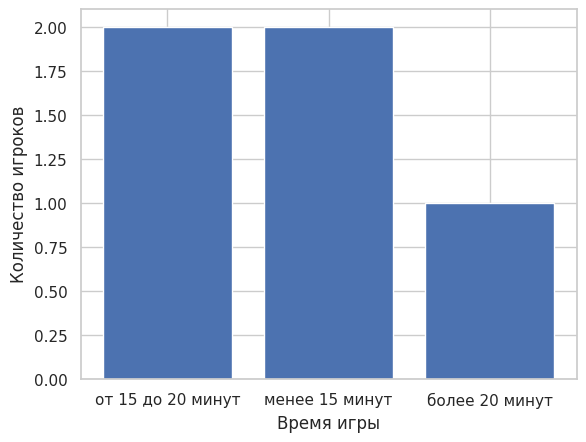

In [162]:
def segment(row):
    if row['duration_time'] < 15:
        return 'менее 15 минут'
    elif row['duration_time'] < 20:
        return 'от 15 до 20 минут'
    else:
        return 'более 20 минут'

grouped['segment_time'] = grouped.apply(segment, axis=1)
segment_counts = grouped['segment_time'].value_counts()
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Время игры')
plt.ylabel('Количество игроков')
plt.show()